## Ahmad Hojatimalekshah

### Collaborate: Arash Modaresi, Amir Kazemzadeh, Ali Nazari

# CS534 Homework 2

Put your homework in the directory with your name. Please mentionin this file the names of any students with whom you collaborated. If you didn't collaborate with anyone, mark your collaborators as "None." Remember, your goal is to communicate. Full credit will be given only to correct solutions which are described clearly. Convoluted and obtuse descriptions will receive low marks. To complete your homework, you may ONLY consult the following material:

lecture slides
course notes you or others took during lecture.
the required text (CLRS)
websites that may clarify the concepts covered in the material but do not in any way provide complete solutions to the problems.
Deadline 3/4/2020

Please provide an answer to the following question: 

# Question 1 (15 pts)
Implement the fit and predict procedures for the logistic regression (scikit is not allowed) with norm 2 regularization function (and Lambda parameter).
Use as the imput parameters of the gradient ascent the maximum number of iterations (just a constant e.g 100) and the learning factor (e.g. 0.01).


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import math 
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , StratifiedKFold,KFold

## Read the data

#### We use iris data for the logistic regression. For creating binary data, we set setosa Species to 0 and the others as 1.

In [2]:
iris_d = sm.datasets.get_rdataset('iris')
iris = iris_d.data
iris.rename(columns=lambda x: x.replace('.', ''), inplace=True)
iris.loc[iris.Species != 'setosa','Species']=1
iris.loc[iris.Species == 'setosa','Species']=0
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### We split train(70%) and test(30%) data.
- y_test and y_train are test and train targets.
- x_test and x_train are test and train features.

In [3]:
test = iris.sample(frac=0.3,random_state=4)
train_mask = pd.Series(True, index=iris.index)
train_mask[test.index] = False
train = iris[train_mask]

y_test = test.Species
y_train = train.Species

x_test = test.drop('Species', axis=1)
x_train = train.drop('Species', axis=1)

#### We need to standardize the dataset, then we subtract the mean of the feature column from each column and devide the result by the standard deviation of the column.

In [4]:
x_train_std = (x_train-np.mean(x_train))/np.std(x_train)
x_test_std = (x_test-np.mean(x_test))/np.std(x_test)

## Logistic Regression with l2 norm

- X in the function is features
- Y is the target (0 or 1)
- theta is the coefficients we want to estimate
- lrnn_rte is the information or learning rate of the gradient ascent (here 0.01)
- num_itr is the number of iteration for ending the gradient ascent optimization 
- C is the lambda parameter

In [5]:
def logistic_reg_l2(X,Y,lrn_rte,num_itr,C):
    X = np.hstack((np.ones((len(X), 1)), X))
    theta = np.zeros((X.shape[1], 1))

    # loop over number of iterations
    for itr in range(num_itr):

    # predict probability for each row in the dataset
        predictions = (1 / (1 + np.exp(-np.dot(X, theta))))
        
    # calculate the errors
        errors = (np.array([Y])).T - predictions

    # loop over each weight coefficient
        for i in range(len(theta)):
            
    # derivation of log-likelihood function + l2 regularization        
            drvt = np.dot((errors).T, X[:,i])
            if i!=0:
                drvt -= 2 * C * theta[i]
                
    # Gradient Ascent update          
            theta[i] += lrn_rte * drvt
        
    # compute the log-likelihood
        ll = np.sum(((np.array([Y])).T-1)*np.dot(X, theta) - np.log(1 + np.exp(-np.dot(X, theta))))- (C * np.sum(theta[1:]**2))
        
    return theta

## Results

In [6]:
theta = logistic_reg_l2(x_train_std, y_train,1e-2,100,1)

#### For finding the accuracy we need to add ones column to the train and test feature data for intercept.

In [7]:
X_test  = np.hstack((np.ones((len(x_test_std), 1)), x_test_std))
X_train  = np.hstack((np.ones((len(x_train_std), 1)), x_train_std))

#### Probabilities (sigmoid) greater than 0.5 are taken as 1 and probabilities less than 0.5 are taken as 0

In [8]:
test_predictions  = ((1 / (1 + np.exp(-np.dot(X_test, theta)))).flatten()>0.5)
train_predictions = ((1 / (1 + np.exp(-np.dot(X_train, theta)))).flatten()>0.5)

#### Train Accuracy

In [9]:
prd_train = pd.DataFrame({'estimate':(train_predictions).astype('int64'), 'real':y_train,'count':np.ones((len(y_train)))})
prd_admt_train = pd.DataFrame(prd_train,columns=['estimate','real','count'])
out_counts_train = prd_admt_train.groupby(['estimate', 'real'])['count'].count()
# out_counts_test.unstack()
(out_counts_train[0][0]+out_counts_train[1][1])/sum(out_counts_train)

1.0

#### Test Accuracy

In [10]:
prd_test = pd.DataFrame({'estimate':(test_predictions).astype('int64'), 'real':y_test,'count':np.ones((len(y_test)))})
prd_admt_test = pd.DataFrame(prd_test,columns=['estimate','real','count'])
out_counts_test = prd_admt_test.groupby(['estimate', 'real'])['count'].count()
# out_counts_test.unstack()
(out_counts_test[0][0]+out_counts_test[1][1])/sum(out_counts_test)

0.9777777777777777

# Question 2 (20 pts)
Use the iris dataset (just the binary class Iris Setosa vs others), the K-fold cross validation, metrics(accuracy, precision, recall, F1-score) and the logistic regression (Question1) with L2 regularization.
You can use scikit.
Please estimate the best parameter C(the inverse of lambda) 



## Read the data

#### We set y value for all species rather than Setosa equal 1

In [11]:
iris = datasets.load_iris()
X = iris.data
y = iris.target 
y[y == 2]=1


In [12]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
sc = StandardScaler()
X_test_std = sc.fit_transform(X_test)

## Logistic Regression fit by l2 and the results (accuracy, precision, recall, F1_score)
#### We use K-fold cross validation with number of splits equal 5
#### We also standardize train and tests 

- C : the inverse of the lambda
- n_splits : number of splits for K-Fold cross validation
- ind : list of test and train index splitted by K-Fold
- df2 : result dataframe containing the C, fold number, train accuracy, test accuracy, recall, precision, F1_score
- X_train_std: standardized train features
- X_test_std: standardized test features
- y_train: train targets (0,1)
- y_test: test targets (0,1)
- y_train_predict: train prediction
- y_test_predict: test prediction 

In [13]:
# defining "C" values
C = np.linspace(0.0001,0.05,50)
# C = [0.0001,0.,0.0005 ,0.001]

# number of splits for K-Fold cross validation
n_splits= 5

# Defining a K-Fold cross validation
skf = KFold(n_splits=n_splits,random_state=4,shuffle=True )

# Train and validation data index
ind = list(skf.split(X, y))

# Empty DataFrame for results
df2 = pd.DataFrame()

# loop over "C" and different folds
for i in C:
    
    # Creating logistic regression fit + l2 regularization
    clf = LogisticRegression(penalty='l2', C=i, solver='liblinear')
    
    # Loop over the folds
    for j in range(0,n_splits):
        # Train and test data for each fold
        X_train = X[ind[j][0]]
        y_train = y[ind[j][0]]
        X_valid = X[ind[j][1]]
        y_valid = y[ind[j][1]]
        
        # Standardize the train and test data
        sc = StandardScaler()
        X_train_std = sc.fit_transform(X_train)
        X_valid_std = sc.transform(X_valid)
        
        # Fitting the logistic regression
        clf.fit(X_train_std, y_train)
        
        # train and test prediction
        y_train_predict = clf.predict(X_train_std)
        y_valid_predict = clf.predict(X_valid_std)
        
        # Writing the results as a dataframe 
        df1 = pd.DataFrame({'Fold':[j+1],'C':[i], 'Train Accuracy':[clf.score(X_train_std, y_train)],
                            'Validation Accuracy':[clf.score(X_valid_std, y_valid)], 'Recall':[recall_score(y_valid, y_valid_predict)],
                            'Precision':[precision_score(y_valid, y_valid_predict)],'F1_score':[f1_score(y_valid, y_valid_predict)]})
        
        df2 = pd.concat([df1, df2])

## Results

In [14]:
df2

,Fold,C,Train Accuracy,Validation Accuracy,Recall,Precision,F1_score
0,5,0.050000,1.000000,1.000000,1.0000,1.0,1.000000
0,4,0.050000,1.000000,1.000000,1.0000,1.0,1.000000
0,3,0.050000,1.000000,1.000000,1.0000,1.0,1.000000
0,2,0.050000,1.000000,1.000000,1.0000,1.0,1.000000
0,1,0.050000,1.000000,1.000000,1.0000,1.0,1.000000
0,5,0.048982,1.000000,1.000000,1.0000,1.0,1.000000
0,4,0.048982,1.000000,1.000000,1.0000,1.0,1.000000
0,3,0.048982,1.000000,1.000000,1.0000,1.0,1.000000
0,2,0.048982,1.000000,1.000000,1.0000,1.0,1.000000
0,1,0.048982,1.000000,1.000000,1.0000,1.0,1.000000


#### Plot the mean train and test accuracy by different "C"s 

- We group the result by "C" value and take the mean of the test and train accuracy for each group. Then. we plot those by different "C" values. 

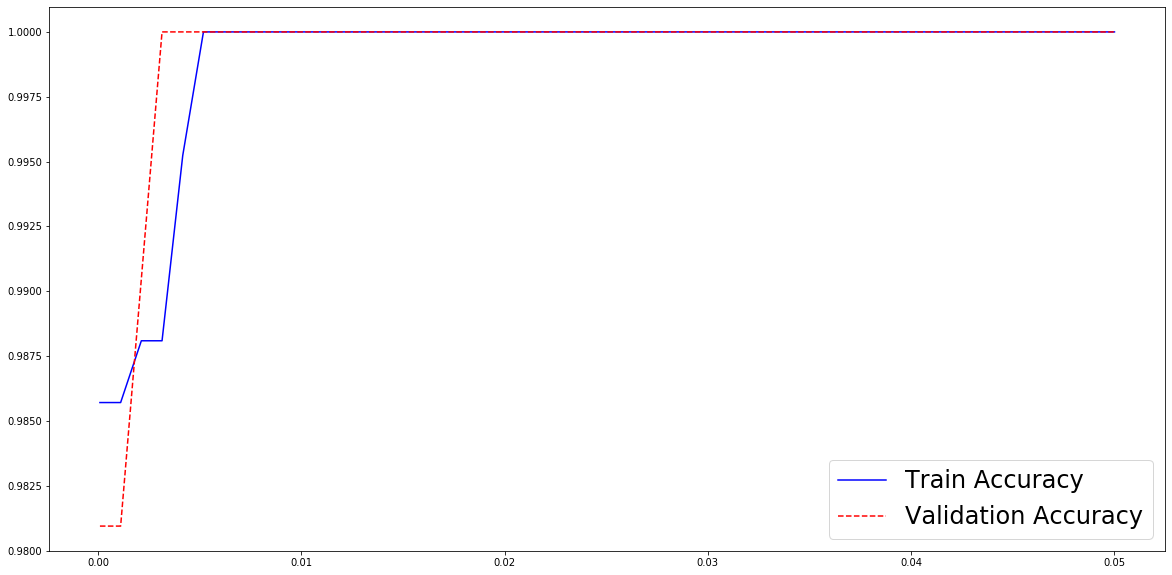

In [15]:
plt.figure(figsize=(20,10))
plt.plot(C, df2.groupby(['C'])['Train Accuracy'].mean(), 'b')
plt.plot(C, df2.groupby(['C'])['Validation Accuracy'].mean(), '--r')
plt.legend(("Train Accuracy", "Validation Accuracy"),fontsize=24)

#### We chose C, where the validation and train started to become 1. 
#### It seems C=0.005 is the optimum C for the logistic regression. However, values less than C in the interval where the test accuracy started to become greater than train (both have high accuracy) can also be considered the optimum C.

### Lets see the prediction for the test dataset by C=0.005

In [16]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X)
# logisitc regression fit by C = 0.005
clf = LogisticRegression(penalty='l2', C=0.005, solver='liblinear')
clf.fit(X_train_std, y)
# test accuracy
clf.score(X_test_std, y_test)

1.0